对应 `tf.keras` 的01~02章节

In [18]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import sklearn
import pandas as pd
import os
import sys
import time
from tqdm.auto import tqdm
import torch
import torch.nn as nn
import torch.nn.functional as F

print(sys.version_info)
for module in mpl, np, pd, sklearn, torch:
    print(module.__name__, module.__version__)

device = torch.device("cuda:0") if torch.cuda.is_available() else torch.device("cpu")
print(device)


sys.version_info(major=3, minor=12, micro=3, releaselevel='final', serial=0)
matplotlib 3.10.8
numpy 2.4.1
pandas 3.0.0
sklearn 1.8.0
torch 2.10.0+cu128
cuda:0


In [101]:
28 * 28

784

## 数据准备

In [70]:
from torchvision import datasets
from torchvision.transforms import ToTensor
from torchvision import transforms

# 定义数据集的变换
transform = transforms.Compose([
    transforms.ToTensor(), # 转换为tensor，进行归一化
    # transforms.Normalize(mean, std) # 标准化，mean和std是数据集的均值和方差
])
# fashion_mnist图像分类数据集，衣服分类，60000张训练图片，10000张测试图片
train_ds = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=transform
)

test_ds = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=transform
)

# torchvision 数据集里没有提供训练集和验证集的划分
# 当然也可以用 torch.utils.data.Dataset 实现人为划分

In [71]:
type(train_ds)

torchvision.datasets.mnist.FashionMNIST

In [72]:
len(train_ds)

60000

In [73]:
type(train_ds[0])

tuple

In [74]:
# 通过id取数据，取到的是一个元组,是第一个样本,在训练时，把特征和标签分开
img, label = train_ds[0]
img.shape
# img.shape = (1, 28, 28)，这是因为通道数在最前面

torch.Size([1, 28, 28])

In [75]:
type(img)  #tensor中文是张量,和numpy的ndarray类似

torch.Tensor

In [76]:
img[0]

tensor([[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510, 0.2863, 0.0000,
         0.0000, 0.0039, 0.0157, 0.0000, 0.0000, 0.0000

In [53]:
img

In [37]:
#计算均值和方差
def cal_mean_std(ds):
    mean = 0.
    std = 0.
    for img, _ in ds:  # 遍历每张图片,img.shape=[1,28,28]
        mean += img.mean(dim=(1, 2))
        std += img.std(dim=(1, 2))
    mean /= len(ds)
    std /= len(ds)
    return mean, std


print(cal_mean_std(train_ds))

(tensor([0.2860]), tensor([0.3205]))


In [11]:
type(img)

PIL.Image.Image

In [12]:
label

9

In [13]:
type(img)  #tensor中文是张量,和numpy的ndarray类似

PIL.Image.Image

In [14]:
label

9

In [54]:
# 显示图片，这里需要把transforms.ToTensor(),进行归一化注释掉，否则是不行的
def show_img_content(img):
    from PIL import Image

    # 打开一个图像文件
    # img = Image.open(img)

    print("图像大小:", img.size)
    print("图像模式:", img.mode)

    # 如果图像是单通道的，比如灰度图，你可以这样获取像素值列表：
    if img.mode == 'L':
        pixel_values = np.array(img).flatten().tolist()#原写法：list(img.getdata())
        print(pixel_values)


show_img_content(img)  #这里必须把上面的 transforms.ToTensor(), # 转换为tensor，进行归一化注释掉，否则是不行的

图像大小: (28, 28)
图像模式: L
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 13, 73, 0, 0, 1, 4, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 36, 136, 127, 62, 54, 0, 0, 0, 1, 3, 4, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 6, 0, 102, 204, 176, 134, 144, 123, 23, 0, 0, 0, 0, 12, 10, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 155, 236, 207, 178, 107, 156, 161, 109, 64, 23, 77, 130, 72, 15, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 69, 207, 223, 218, 216, 216, 163, 127, 121, 122, 146, 141, 88, 172, 66, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 200, 232, 232, 233, 229, 223, 223, 215, 213, 164, 127, 123, 196, 229, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 183, 225, 216, 223, 228, 235, 227, 224, 222, 224, 221, 223, 245, 173, 0, 0, 0, 

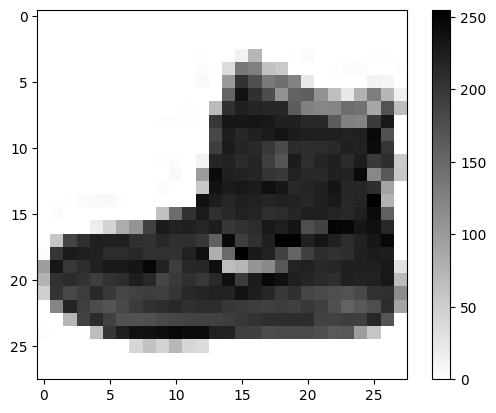

In [55]:
#这个代码必须是注释了上面的 transforms.ToTensor()才能够运行的
def show_single_image(img_arr):
    plt.imshow(img_arr, cmap="binary")  # 显示图片
    plt.colorbar()  # 显示颜色条
    plt.show()


show_single_image(img)

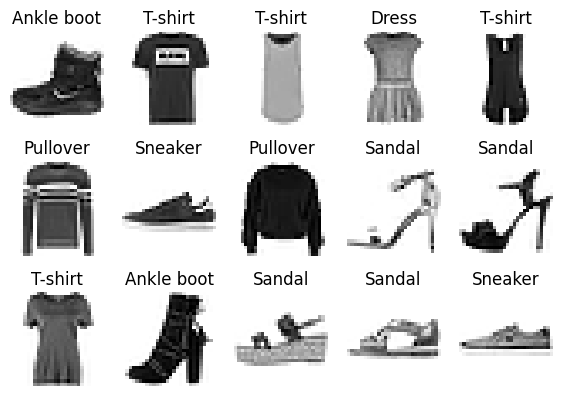

In [56]:
def show_imgs(n_rows, n_cols, train_ds, class_names):
    assert n_rows * n_cols < len(train_ds)  #确保打印的图片小于总样本数
    plt.figure(figsize=(n_cols * 1.4, n_rows * 1.6))  #宽1.4高1.6，宽，高
    for row in range(n_rows):
        for col in range(n_cols):
            index = n_cols * row + col  # 计算索引，从0开始
            plt.subplot(n_rows, n_cols, index + 1)  #因为从1开始
            img_arr, label = train_ds[index]
            
            #确保img_arr是numpy数组
            if not isinstance(img_arr, np.ndarray):
                img_arr = np.array(img_arr)
            
            #如果形状是(C,H,W)且通道数较小（如1或3），则转置为(H,W,C)
            if img_arr.ndim==3 and img_arr.shape[0] in (1,3):
                img_arr = np.transpose(img_arr, (1, 2, 0))  # 通道换到最后一维
                
            #如果已经是(H,W)或(H,W,C)的格式，则直接使用
            plt.imshow(img_arr, cmap="binary",
                       interpolation='nearest')  #interpolation='nearest'是临近插值
            plt.axis('off')  #去除坐标系
            plt.title(class_names[label])  # 显示类别名称
    plt.show()


#已知的图片类别
# lables在这个路径https://github.com/zalandoresearch/fashion-mnist
class_names = ['T-shirt', 'Trouser', 'Pullover', 'Dress',
               'Coat', 'Sandal', 'Shirt', 'Sneaker',
               'Bag', 'Ankle boot']  #0-9分别代表的类别
#只是打印了前15个样本
show_imgs(3, 5, train_ds, class_names)


In [104]:
# 从数据集到dataloader
train_loader = torch.utils.data.DataLoader(train_ds, batch_size=32, shuffle=True)  #batch_size分批，shuffle洗牌(随机)
val_loader = torch.utils.data.DataLoader(test_ds, batch_size=32, shuffle=False)

在PyTorch中，`DataLoader`是一个迭代器，它封装了数据的加载和预处理过程，使得在训练机器学习模型时可以方便地批量加载数据。`DataLoader`主要负责以下几个方面：

1. **批量加载数据**：`DataLoader`可以将数据集（Dataset）切分为更小的批次（batch），每次迭代提供一小批量数据，而不是单个数据点。这有助于模型学习数据中的统计依赖性，并且可以更高效地利用GPU等硬件的并行计算能力。

2. **数据打乱**：默认情况下，`DataLoader`会在每个epoch（训练周期）开始时打乱数据的顺序。这有助于模型训练时避免陷入局部最优解，并且可以提高模型的泛化能力。

3. **多线程数据加载**：`DataLoader`支持多线程（通过参数`num_workers`）来并行地加载数据，这可以显著减少训练过程中的等待时间，尤其是在处理大规模数据集时。

4. **数据预处理**：`DataLoader`可以与`transforms`结合使用，对加载的数据进行预处理，如归一化、标准化、数据增强等操作。

5. **内存管理**：`DataLoader`负责管理数据的内存使用，确保在训练过程中不会耗尽内存资源。

6. **易用性**：`DataLoader`提供了一个简单的接口，可以很容易地集成到训练循环中。

## 定义模型

In [105]:
"""
用于 Fashion-MNIST 图像分类的全连接神经网络
（1）NeuralNetwork 继承自 PyTorch 的基类 nn.Module，所有自定义模型都应继承该类
（2）super().__init__() 调用父类构造函数，确保模型能正确注册所有子层和参数
（3）nn.Flatten() 将输入张量展平，从多维变为二维。
对于形状为 (batch_size, 1, 28, 28) 的输入（Fashion-MNIST 的单通道 28×28 图像），
展平后变为 (batch_size, 1*28*28) = (batch_size, 784)，以便输入全连接层
（4）nn.Sequential 按顺序封装多个层，数据依次流过这些层。

全连接层：nn.Linear(in_features, out_features) 执行线性变换y=xWT+b（x乘以W的转置，加上偏置b），参数包括权重和偏置。
激活函数：nn.ReLU() 引入非线性，使网络能够学习复杂模式。
网络结构：784 → 300 → ReLU → 100 → ReLU → 10。输出维度为 10，对应 Fashion-MNIST 的 10 个类别
（5）forward 定义数据如何从输入到输出。
输入 x 形状为 (batch_size, 1, 28, 28)，经过 flatten 后变为 (batch_size, 784)。
然后经过 linear_relu_stack，输出形状为 (batch_size, 10) 的logits（未经过 softmax 的原始分数）。
返回 logits，后续在损失函数（如 nn.CrossEntropyLoss）中会自动应用 softmax 计算交叉熵
"""
class NeuralNetwork(nn.Module):#一定要继承nn.Module
    def __init__(self):
        super().__init__()  # 继承父类的初始化方法，子类有父类的属性
        self.flatten = nn.Flatten()  # 展平层，二维转换为一维
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(784, 300),  # in_features=784, out_features=300, 784是输入特征数，300是输出特征数
            nn.ReLU(),  # 激活函数
            nn.Linear(300, 100),  #隐藏层神经元数100，输出100个神经元，因此偏置是100
            nn.ReLU(),  # 激活函数
            nn.Linear(100, 10),  #输出层神经元数10，输出10个神经元，因此偏置是10
        )

    def forward(self, x):  # 前向计算，名字一定要叫forward，不能改，因为训练的时候要调用这个方法
        # x.shape [batch size, 1, 28, 28]
        x = self.flatten(x)
        # 展平后 x.shape [batch size, 784]
        logits = self.linear_relu_stack(x)
        # logits.shape [batch size, 10]
        return logits  # 没有经过 softmax 的值称为 logits
"""
linear_relu_stack 是在 __init__ 方法中定义的一个 nn.Sequential 容器，它内部按顺序包含了三个全连接层（nn.Linear）和两个 ReLU 激活函数。在 forward 方法中，它的作用是将经过 flatten 展平后的图像特征向量（形状为 [batch_size, 784]）依次传入这个序列，完成以下计算：
第一层线性变换：将 784 维输入映射到 300 维隐藏层。
ReLU 激活函数：为网络引入非线性，使模型能够学习更复杂的模式。
第二层线性变换：从 300 维压缩到 100 维。
再次应用 ReLU 激活。
最后一层线性变换：从 100 维映射到 10 维输出（对应 10 个分类的 logits）
"""
model = NeuralNetwork()

In [106]:
# 看看网络结构
model

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=300, bias=True)
    (1): ReLU()
    (2): Linear(in_features=300, out_features=100, bias=True)
    (3): ReLU()
    (4): Linear(in_features=100, out_features=10, bias=True)
  )
)

In [107]:
"""
模型参数量计算
（1）第一层 Linear(784,300)：权重 784×300 = 235,200，偏置 300 → 235,500
（2）第二层 Linear(300,100)：权重 300×100 = 30,000，偏置 100 → 30,100
（3）第三层 Linear(100,10)：权重 100×10 = 1,000，偏置 10 → 1,010
总参数量 = 235,500 + 30,100 + 1,010 = 266,610 个可学习参数
"""
784 * 300 + 300 + 300 * 100 + 100 + 100 * 10 + 10

266610

In [108]:
for name, param in model.named_parameters():  # 打印模型参数
    print(name, "————",param.shape)

linear_relu_stack.0.weight ———— torch.Size([300, 784])
linear_relu_stack.0.bias ———— torch.Size([300])
linear_relu_stack.2.weight ———— torch.Size([100, 300])
linear_relu_stack.2.bias ———— torch.Size([100])
linear_relu_stack.4.weight ———— torch.Size([10, 100])
linear_relu_stack.4.bias ———— torch.Size([10])


In [109]:
# 看看模型参数
list(model.parameters())  # 这种方法拿到模型的所有可学习参数，requires_grad=True

[Parameter containing:
 tensor([[ 0.0343, -0.0357, -0.0151,  ..., -0.0296,  0.0208,  0.0117],
         [ 0.0164,  0.0160,  0.0006,  ..., -0.0079,  0.0093,  0.0212],
         [ 0.0349,  0.0336, -0.0008,  ...,  0.0196, -0.0216,  0.0146],
         ...,
         [ 0.0140,  0.0003,  0.0261,  ..., -0.0148,  0.0021, -0.0145],
         [-0.0283, -0.0227, -0.0037,  ..., -0.0121, -0.0214,  0.0173],
         [ 0.0293,  0.0313,  0.0012,  ...,  0.0185,  0.0167, -0.0012]],
        requires_grad=True),
 Parameter containing:
 tensor([ 1.9982e-02, -1.7702e-02,  1.8597e-03, -3.0715e-02,  3.9588e-03,
         -1.6362e-02, -3.4247e-02, -3.7043e-03,  3.4060e-03, -2.7278e-02,
         -1.3136e-02, -1.8335e-04, -2.8643e-02,  3.8213e-03, -1.5267e-02,
          9.5555e-03, -6.7780e-03, -1.0777e-02, -1.2997e-02,  5.7515e-03,
         -2.9854e-02, -3.0589e-02,  4.5681e-03, -1.9641e-02,  1.7986e-02,
          1.3650e-02, -5.2472e-03, -3.2979e-02,  2.8717e-02, -1.0825e-02,
         -6.6942e-03,  3.2144e-02,  3.45

In [83]:
# model.state_dict()  # 这种方法用于保存模型参数，能看见参数属于模型的哪一部分

## 训练

pytorch的训练需要自行实现，包括
1. 定义损失函数
2. 定义优化器
3. 定义训练步
4. 训练

In [110]:
# 1. 定义损失函数 采用交叉熵损失
loss_fct = nn.CrossEntropyLoss()  #因为前面没有经过softmax，所以这里内部先做 softmax，然后计算交叉熵
# 2. 定义优化器 采用SGD
# Optimizers specified in the torch.optim package,随机梯度下降
optimizer = torch.optim.SGD(model.parameters(), lr=0.001, momentum=0.9) #优化器，学习率为0.001，动量为0.9

In [111]:
from sklearn.metrics import accuracy_score


@torch.no_grad()  # 装饰器，禁止反向传播，节省内存
def evaluating(model, dataloader, loss_fct):
    loss_list = []  # 记录损失
    pred_list = []  # 记录预测
    label_list = []  # 记录标签
    for datas, labels in dataloader:  #10000/32=313
        datas = datas.to(device)  # 转到 GPU
        labels = labels.to(device)  # 转到 GPU
        # 前向计算
        logits = model(datas)
        loss = loss_fct(logits, labels)  # 验证集损失
        loss_list.append(loss.item())  # 记录损失

        preds = logits.argmax(axis=-1)  # 验证集预测,argmax返回最大值索引
        # print(preds)
        pred_list.extend(preds.cpu().numpy().tolist())  #将 PyTorch 张量转换为 NumPy数组。只有当张量在CPU上时，这个转换才是合法的，无论有没有 GPU， 都是这样写。
        # print(preds.cpu().numpy().tolist())
        label_list.extend(labels.cpu().numpy().tolist())

    acc = accuracy_score(label_list, pred_list)  # 计算准确率
    return np.mean(loss_list), acc


In [86]:
1875 * 20

37500

In [112]:
# 训练
#eval_step=500 每 500 步评估一次
def training(model, train_loader, val_loader, epoch, loss_fct, optimizer, eval_step=500):
    record_dict = {
        "train": [],
        "val": []
    }
    
    print(next(model.parameters()).device)  # 查看模型参数所在设备
    # print(datas.device)                      # 查看数据所在设备

    global_step = 0
    model.train()
    with tqdm(total=epoch * len(train_loader)) as pbar:  # 进度条 1875*20,60000/32=1875
        for epoch_id in range(epoch):  # 训练epoch次
            # training
            for datas, labels in train_loader:  #执行次数是60000/32=1875
                datas = datas.to(device)  #datas尺寸是[batch_size,1,28,28]
                labels = labels.to(device)  #labels尺寸是[batch_size]
                # 梯度清空
                optimizer.zero_grad()
                # 模型前向计算
                logits = model(datas)
                # 计算损失
                loss = loss_fct(logits, labels)
                # 梯度回传，loss.backward()会计算梯度，loss对模型参数求导
                loss.backward()
                # 调整优化器，包括学习率的变动等,优化器的学习率会随着训练的进行而减小，更新w,b
                optimizer.step()  #梯度是计算并存储在模型参数的 .grad 属性中，优化器使用这些存储的梯度来更新模型参数

                preds = logits.argmax(axis=-1)  # 训练集预测
                acc = accuracy_score(labels.cpu().numpy(), preds.cpu().numpy())  # 计算准确率，numpy可以
                loss = loss.cpu().item()  # 损失转到CPU，item()取值,一个数值
                # record

                record_dict["train"].append({
                    "loss": loss, "acc": acc, "step": global_step
                })  # 记录训练集信息，每一步的损失，准确率，步数

                # evaluating
                if global_step % eval_step == 0:
                    model.eval()  # 进入评估模式
                    val_loss, val_acc = evaluating(model, val_loader, loss_fct)
                    record_dict["val"].append({
                        "loss": val_loss, "acc": val_acc, "step": global_step
                    })
                    model.train()  # 进入训练模式，才会求梯度；评估模式下，不会求梯度

                # udate step
                global_step += 1  # 全局步数加1
                pbar.update(1)  # 更新进度条
                pbar.set_postfix({"epoch": epoch_id})  # 设置进度条显示信息

    return record_dict


epoch = 20  #改为40
model = model.to(device)
record = training(model, train_loader, val_loader, epoch, loss_fct, optimizer, eval_step=1000)

cuda:0


  0%|          | 0/37500 [00:00<?, ?it/s]

In [113]:
record["train"][-5:]

[{'loss': 0.39390042424201965, 'acc': 0.90625, 'step': 37495},
 {'loss': 0.21520374715328217, 'acc': 0.90625, 'step': 37496},
 {'loss': 0.372575581073761, 'acc': 0.90625, 'step': 37497},
 {'loss': 0.2481197863817215, 'acc': 0.9375, 'step': 37498},
 {'loss': 0.27813005447387695, 'acc': 0.875, 'step': 37499}]

In [114]:
record["val"][-5:]

[{'loss': np.float64(0.36381172136472056), 'acc': 0.8698, 'step': 33000},
 {'loss': np.float64(0.36451307148598255), 'acc': 0.8685, 'step': 34000},
 {'loss': np.float64(0.35556691513655664), 'acc': 0.8729, 'step': 35000},
 {'loss': np.float64(0.3784749870435498), 'acc': 0.8644, 'step': 36000},
 {'loss': np.float64(0.358346058942449), 'acc': 0.8698, 'step': 37000}]

step
0        0.09375
1000     0.62500
2000     0.65625
3000     0.78125
4000     0.84375
5000     0.84375
6000     0.87500
7000     0.93750
8000     0.90625
9000     0.87500
10000    0.93750
11000    0.65625
12000    0.81250
13000    0.78125
14000    0.87500
15000    0.84375
16000    0.84375
17000    0.78125
18000    0.87500
19000    0.93750
20000    0.81250
21000    0.71875
22000    0.93750
23000    0.78125
24000    0.93750
25000    0.81250
26000    0.96875
27000    0.81250
28000    0.90625
29000    0.96875
30000    0.84375
31000    0.78125
32000    0.93750
33000    0.90625
34000    0.96875
35000    0.96875
36000    0.87500
37000    0.84375
Name: acc, dtype: float64
step
0        0.1182
1000     0.6752
2000     0.7703
3000     0.8011
4000     0.8132
5000     0.8180
6000     0.8269
7000     0.8313
8000     0.8347
9000     0.8337
10000    0.8414
11000    0.8353
12000    0.8459
13000    0.8472
14000    0.8437
15000    0.8511
16000    0.8518
17000    0.8480
18000    0.8569
19000    0.856

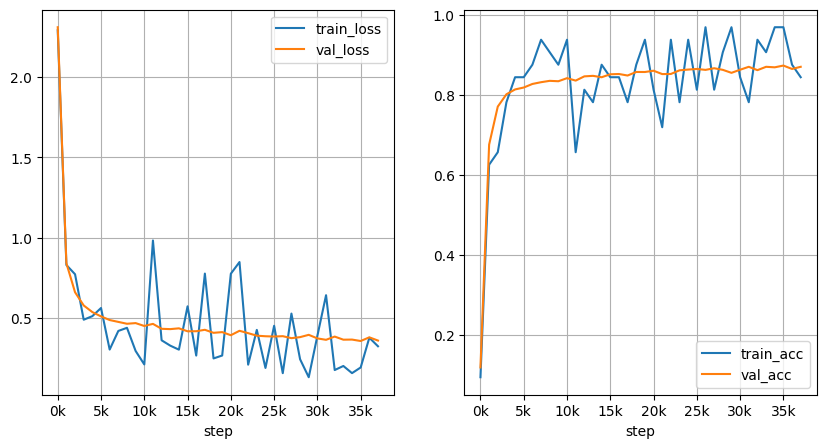

In [115]:
#画线要注意的是损失是不一定在 0 到 1 之间的
def plot_learning_curves(record_dict, sample_step=1000):
    # build DataFrame
    train_df = pd.DataFrame(record_dict["train"]).set_index("step").iloc[::sample_step]
    val_df = pd.DataFrame(record_dict["val"]).set_index("step")
    last_step = train_df.index[-1]  # 最后一步的步数
    # print(train_df.columns)
    print(train_df['acc'])
    print(val_df['acc'])
    # plot
    fig_num = len(train_df.columns)  # 画几张图,分别是损失和准确率
    fig, axs = plt.subplots(1, fig_num, figsize=(5 * fig_num, 5))
    for idx, item in enumerate(train_df.columns):
        # print(train_df[item].values)
        axs[idx].plot(train_df.index, train_df[item], label=f"train_{item}")
        axs[idx].plot(val_df.index, val_df[item], label=f"val_{item}")
        axs[idx].grid()  # 显示网格
        axs[idx].legend()  # 显示图例
        axs[idx].set_xticks(range(0, train_df.index[-1], 5000))  # 设置x轴刻度
        axs[idx].set_xticklabels(map(lambda x: f"{int(x / 1000)}k", range(0, last_step, 5000)))  # 设置x轴标签
        axs[idx].set_xlabel("step")

    plt.show()


plot_learning_curves(record)  #横坐标是 steps

## 评估

In [116]:
# dataload for evaluating
model.eval()  # 进入评估模式
model = model.to(device)          # 确保模型在 GPU 上
loss, acc = evaluating(model, val_loader, loss_fct)
print(f"loss:     {loss:.4f}\naccuracy: {acc:.4f}")

loss:     0.3619
accuracy: 0.8690
